In [1]:
from __future__ import print_function
import re
import pdfplumber
import requests 
import time
import matplotlib.pyplot as plt
import numpy as np

import datetime
import os.path

from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

In [2]:
with pdfplumber.open("sche.pdf") as pdf:   #open the schedule pdf and extract its text
    page = pdf.pages[0]
    text = page.extract_text()

print(text)


AUIS
Student Schedule
Fall 2022/23
Al Dhahab, Zaid
ID:  019000288 Level:  3 Student Campus:  AUIS
Course Sect. Description Credits Instructor Start Date End Date Grade Location Days and Times
CIV 203 1 Ancient World: Humanities 3.00 Monsma, Frederick 09/04/2022 12/01/2022 *** A-B1-08 MON 9:45am-11:15am Lecture
Monsma, Frederick 09/04/2022 12/01/2022 A-B1-08 WED 9:45am-11:15am Lecture
ENG 101 3 Argument 3.00 Danilovich, Stephen 09/04/2022 12/01/2022 *** A-B1-11 TUE 10:30am-11:30am Lecture
Danilovich, Stephen 09/04/2022 12/01/2022 A-B1-11 THU 10:30am-11:30am Lecture
Danilovich, Stephen 09/04/2022 12/01/2022 A-B1-11 SUN 10:30am-11:30am Lecture
ENGR 344 1 Mechanics I 3.00 Hassan, Aram 09/04/2022 12/01/2022 *** B-F2-31 TUE 1:00pm-2:00pm Lecture
Hassan, Aram 09/04/2022 12/01/2022 B-F2-31 THU 1:00pm-2:00pm Lecture
Hassan, Aram 09/04/2022 12/01/2022 B-F2-31 SUN 1:00pm-2:00pm Lecture
ITE 202 1 IT System 3.00 Lukwesa, Katongo 09/04/2022 12/01/2022 *** B-B1-01 MON 12:30pm-2:00pm Lecture
Lukwesa, 

In [3]:
tet = text.split("\n")
prog = re.compile(r'[A-Z]{2,5} [0-9]{3}')      #parameters for the course title
dayprog = re.compile(r'\bSUN|MON|TUE|WED|THU')  #parameters for the days
cls = prog.findall(text)

courses = [["", "","",""],["", "","",""],["", "","",""],["", "","",""],["", "","",""],["", "","",""]];    #empty matrix for keeping the information gathered(title and day)

i = -1;
x= 0;

for line in tet:    #reads the text line by line
    if prog.findall(line):
        coursename = prog.findall(line); #takes the title first at the begingning of every array
        x=0;
        i= i+1;
        courses[i][0] = coursename
        
    if dayprog.findall(line):   #takes the day and puts it after the title so that they stay relative
        x= x+1;
        courses[i][x] = (dayprog.findall(line))
        
print(courses)

[[['CIV 203'], ['MON'], ['WED'], ''], [['ENG 101'], ['TUE'], ['THU'], ['SUN']], [['ENGR 344'], ['TUE'], ['THU'], ['SUN']], [['ITE 202'], ['MON'], ['WED'], ''], [['STT 201'], ['TUE'], ['THU'], ['SUN']], ['', '', '', '']]


In [4]:
hour = [];
prog = re.compile(r'[0-9]{1,2}[:][0-9]{2}[a-z]{2}.')     #extracts the hours when the class starts and ends (in the correct order)
for line in text.split():
    if prog.match(line):
        hour.append(line);

print(hour)

loc = []; 
locprog = re.compile(r'\b[A-B]-')
for line in text.split():
    if locprog.match(line):
        loc.append(line);


print(loc)

['9:45am-11:15am', '9:45am-11:15am', '10:30am-11:30am', '10:30am-11:30am', '10:30am-11:30am', '1:00pm-2:00pm', '1:00pm-2:00pm', '1:00pm-2:00pm', '12:30pm-2:00pm', '12:30pm-2:00pm', '9:15am-10:15am', '9:15am-10:15am', '9:15am-10:15am']
['A-B1-08', 'A-B1-08', 'A-B1-11', 'A-B1-11', 'A-B1-11', 'B-F2-31', 'B-F2-31', 'B-F2-31', 'B-B1-01', 'B-B1-01', 'A-B1-42', 'A-B1-42', 'A-B1-42']


In [5]:
b=hour;
entry =[re.split("-", entry, 9) for entry in b]  #removes the dash from the hours and seprates them

shourz = [];
ehourz = [];

sount =0;
newhour = [];
start= [];
end= [];
count = 0;

for string in entry:   
    for lime in string:
        def convert(time_string):
            date_var = time.strptime(time_string, '%I:%M%p')      #turns the hours to 24 hours and splits the minutes

            return date_var

        my_time = convert(lime)
        
        
        if my_time.tm_min == 15:                      #changes the minutes to deciml points for the graph
            newhour.append(my_time.tm_hour + .25);
            
        if my_time.tm_min == 30:
            newhour.append(my_time.tm_hour + .5);
            
        if my_time.tm_min == 45:
            newhour.append(my_time.tm_hour + .75);
            
        if my_time.tm_min == 0:
            newhour.append(my_time.tm_hour); 
            
        
        if sount == 0:                              #puts the odd in start and the even to the end
            start.append(newhour[count]); 
            shourz.append(str(my_time.tm_hour)+":"+str(my_time.tm_min))
            sount = 1; 
        else:
            end.append(newhour[count]); 
            ehourz.append(str(my_time.tm_hour)+":"+str(my_time.tm_min))
            sount = 0; 
        
        
        count+=1;

last = []; 
for i, j in zip(end,start):
 
    last.append(i - j)                          #finds out how long each class lasts for
print(shourz)
print(ehourz)
print(newhour)
print(start)
print(end)

['9:45', '9:45', '10:30', '10:30', '10:30', '13:0', '13:0', '13:0', '12:30', '12:30', '9:15', '9:15', '9:15']
['11:15', '11:15', '11:30', '11:30', '11:30', '14:0', '14:0', '14:0', '14:0', '14:0', '10:15', '10:15', '10:15']
[9.75, 11.25, 9.75, 11.25, 10.5, 11.5, 10.5, 11.5, 10.5, 11.5, 13, 14, 13, 14, 13, 14, 12.5, 14, 12.5, 14, 9.25, 10.25, 9.25, 10.25, 9.25, 10.25]
[9.75, 9.75, 10.5, 10.5, 10.5, 13, 13, 13, 12.5, 12.5, 9.25, 9.25, 9.25]
[11.25, 11.25, 11.5, 11.5, 11.5, 14, 14, 14, 14, 14, 10.25, 10.25, 10.25]


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=589120295956-kelhjed1ma7vlt8bopnosjr1i7skdkkv.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A61626%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcalendar&state=gPQF0DbN7vYfplJJ9VANA7UZx3k1CV&access_type=offline
Event created: https://www.google.com/calendar/event?eid=a2p0ZXV1YjVlM2EzZWNwaTI1bWlkdWNzbXNfMjAyMzA5MDRUMDY0NTAwWiBzdXBlcm5vdmFzY291dDQ2QG0
Event created: https://www.google.com/calendar/event?eid=dmIwZDNtMjE1bjZ2ZDJtZ2NiOGEyZmRnNzBfMjAyMzA5MDZUMDY0NTAwWiBzdXBlcm5vdmFzY291dDQ2QG0
Event created: https://www.google.com/calendar/event?eid=MjVlNzdnbnY2NnM3OTEyY2NhMmtpNGprdjRfMjAyMzA5MDVUMDczMDAwWiBzdXBlcm5vdmFzY291dDQ2QG0
Event created: https://www.google.com/calendar/event?eid=bGFpcmE2aGFhM3ZnM2kzaHQzbWpkb2I1bm9fMjAyMzA5MDdUMDczMDAwWiBzdXBlcm5vdmFzY291dDQ2QG0
Event created: https://www.google.com/calendar/event?eid=cHNnbnZxdWhnMzljYWxtN

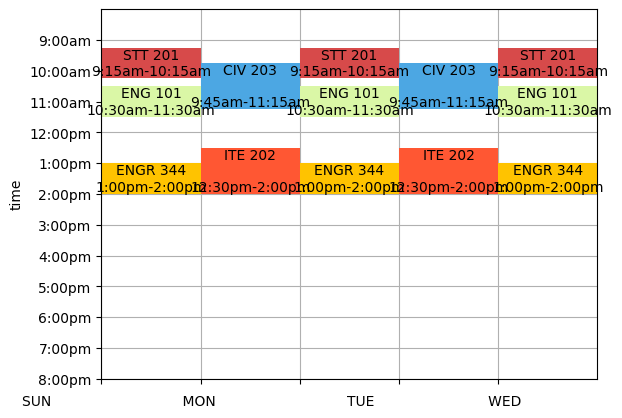

In [7]:

SCOPES = ['https://www.googleapis.com/auth/calendar']

def main(i, x, date):
            creds = None
            if os.path.exists('token.json'):
                creds = Credentials.from_authorized_user_file('token.json', SCOPES)
        
            if not creds or not creds.valid:
                if creds and creds.expired and creds.refresh_token:
                    creds.refresh(Request())
                else:
                    flow = InstalledAppFlow.from_client_secrets_file(
                        'credintials.json', SCOPES)
                    creds = flow.run_local_server(port=0)
                with open('token.json', 'w') as token:
                    token.write(creds.to_json())

            try:
                service = build('calendar', 'v3', credentials=creds)
                event = {
                    'summary': cls[i],
                    'location': loc[x],
                    'start': {
                        'dateTime': date+'T'+shourz[x]+':00',
                        'timeZone': 'Etc/GMT-3',
                    },
                    'end': {
                        'dateTime': date+'T'+ehourz[x]+':00',
                        'timeZone': 'Etc/GMT-3',
                    },
                    'recurrence': [
                        'RRULE:FREQ=WEEKLY;COUNT=16'
                    ],
                    'reminders': {
                        'useDefault': False,
                        'overrides': [
                        {'method': 'popup', 'minutes': 15},
                        ],
                    },
                    }

                event = service.events().insert(calendarId='primary', body=event).execute()
                print('Event created: %s' % (event.get('htmlLink')))

            except HttpError as error:
                print('An error occurred: %s' % error)


fig, gnt = plt.subplots()

# Setting X-axis limits
gnt.set_xlim(0, 5)
gnt.set_ylim(8, 20)

# Setting labels for x-axis and y-axis 
gnt.set_xlabel('SUN                              MON                              TUE                          WED                             THU')
gnt.set_ylabel('time')

ax = plt.gca()
ax.invert_yaxis()

# Setting ticks on y-axis
gnt.set_yticks([9, 10,11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

# Labelling tickes of y-axis
gnt.set_yticklabels(['9:00am', '10:00am', '11:00am','12:00pm','1:00pm','2:00pm','3:00pm','4:00pm','5:00pm','6:00pm','7:00pm', '8:00pm'])

gnt.set_xticks([0, 1, 2, 3, 4])
gnt.set_xticklabels([])

# Setting graph attribute and colours 
gnt.grid(True)
colour= ['#4CA7E3', '#DAF7A6', '#FFC300', '#FF5733', '#D74A4A', 'tab:Green']

# Declaring a bar in schedule
i=0;
x=0;
date = "";
while(i<6):         #inputs the courses as broken bars 
    col = colour[i];
    for day in courses[i]:
        if day == ["SUN"]:              # checks days to graphs them
            gnt.broken_barh([(0, 1)], (start[x], last[x]), facecolors =col)
            plt.text(0.5, start[x], cls[i], ha="center", va="top")      #course title
            plt.text(0.5, end[x], hour[x], ha="center", va="bottom")    #course timing
            date = "2023-09-03";
            main(i,x, date)
            x=x+1;
        if day == ["MON"]:
            gnt.broken_barh([(1, 1)], (start[x], last[x]), facecolors =col)
            plt.text(1.5, start[x], cls[i], ha="center", va="top")
            plt.text(1.5, end[x], hour[x], ha="center", va="bottom")
            date = "2023-09-04";
            main(i,x, date)
            x=x+1;
        if day == ["TUE"]:
            gnt.broken_barh([(2, 1)], (start[x], last[x]), facecolors =col)
            plt.text(2.5, start[x], cls[i], ha="center", va="top")
            plt.text(2.5, end[x], hour[x], ha="center", va="bottom")
            date = "2023-09-05";
            main(i,x, date)
            x=x+1;
        if day == ["WED"]:
            gnt.broken_barh([(3, 1)], (start[x], last[x]), facecolors =col)
            plt.text(3.5, start[x], cls[i], ha="center", va="top")
            plt.text(3.5, end[x], hour[x], ha="center", va="bottom")
            date = "2023-09-06";
            main(i,x,date)
            x=x+1;
        if day == ["THU"]:
            gnt.broken_barh([(4, 1)], (start[x], last[x]), facecolors =col)
            plt.text(4.5, start[x], cls[i], ha="center", va="top")
            plt.text(4.5, end[x], hour[x], ha="center", va="bottom")
            date = "2023-09-07";
            main(i,x,date)
            x=x+1;
    i=i+1;

   
gnt.set_axisbelow(True)
plt.rcParams["figure.figsize"] = (10,7)  #resizes the graph
plt.savefig("schdule.png")
